In [1]:
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns

from arnie.free_energy import free_energy
from arnie.utils import write_constraints

Populating the interactive namespace from numpy and matplotlib


Replicating Rosetta-Vienna RNP-ΔΔG analysis, from 

Kappel, K., Jarmoskaite, I., Vaidyanathan, P. P., Greenleaf, W. J., Herschlag, D., & Das, R. (2019). _Blind tests of RNA–protein binding affinity prediction._ PNAS, 116(17), 8336-8341.

Takeaway: CONTRAfold does better without the weighting that Vienna RNAfold requires.

## MS2 training dataset

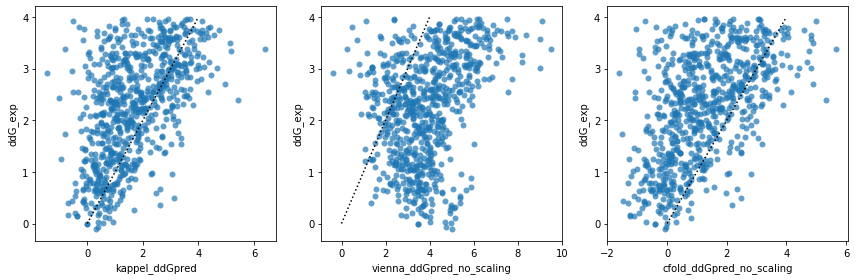

In [6]:
df = pd.read_csv('kappel_pnas_MS2.txt',delimiter=' ') #supplementary dataset 1
df = df.loc[df['ddG_exp']!=3.973700] #remove datapoints with too high kds

df['dG_vienna'] = df.apply(lambda row: free_energy(row['Seq'], package='vienna_2'), axis=1)
df['dG_cfold'] = df.apply(lambda row: free_energy(row['Seq'], package='contrafold'), axis=1)

vienna_scaling = 0.37 #detailed in PNAS paper

#computed to account for rosetta/vienna offset
df['offset'] = df['ddG_RNA']-df['dG_vienna'] * vienna_scaling

df['kappel_ddGpred'] = df['ddG_complex-protein']-(df['dG_vienna']*vienna_scaling+df['offset'])
df['vienna_ddGpred_no_scaling'] = df['ddG_complex-protein']-(df['dG_vienna']+df['offset'])
df['cfold_ddGpred_no_scaling'] = df['ddG_complex-protein']-(df['dG_cfold']+df['offset'])

figure(figsize=(12,4))
         
for i, pred in enumerate(['kappel_ddGpred','vienna_ddGpred_no_scaling','cfold_ddGpred_no_scaling']):
    subplot(1,3,i+1)
    sns.scatterplot(x=pred,y='ddG_exp',data=df,linewidth=0,alpha=0.7)
    plot([0,4],[0,4],linestyle=':',color='k')
tight_layout()

## SRP dataset

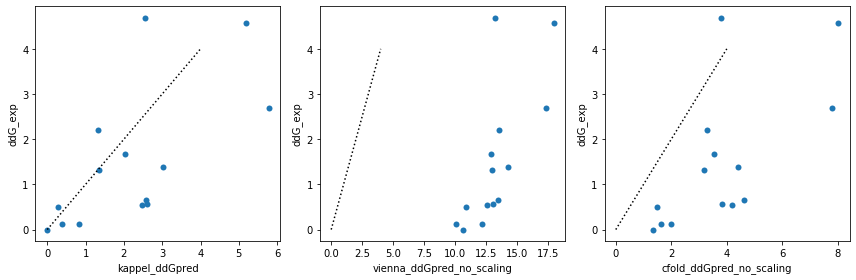

In [13]:
df = pd.read_csv('kappel_pnas_SRP.txt',delimiter=' ') #supplementary dataset 4

#last 47 chars correspond to RNA sequence and not protein
df['dG_vienna'] = df.apply(lambda row: free_energy(row['Seq'][-47:], package='vienna_2'), axis=1)
df['dG_cfold'] = df.apply(lambda row: free_energy(row['Seq'][-47:], package='contrafold'), axis=1)

vienna_scaling = 0.37 #detailed in PNAS paper

#computed to account for rosetta/vienna offset
df['offset'] = df['ddG_RNA']-df['dG_vienna'] * vienna_scaling

df['kappel_ddGpred'] = df['ddG_complex-protein']-(df['dG_vienna']*vienna_scaling+df['offset'])
df['vienna_ddGpred_no_scaling'] = df['ddG_complex-protein']-(df['dG_vienna']+df['offset'])
df['cfold_ddGpred_no_scaling'] = df['ddG_complex-protein']-(df['dG_cfold']+df['offset'])

figure(figsize=(12,4))
         
for i, pred in enumerate(['kappel_ddGpred','vienna_ddGpred_no_scaling','cfold_ddGpred_no_scaling']):
    subplot(1,3,i+1)
    sns.scatterplot(x=pred,y='ddG_exp',data=df,linewidth=0)
    plot([0,4],[0,4],linestyle=':',color='k')
tight_layout()

# PUM2 dataset (blind originally)

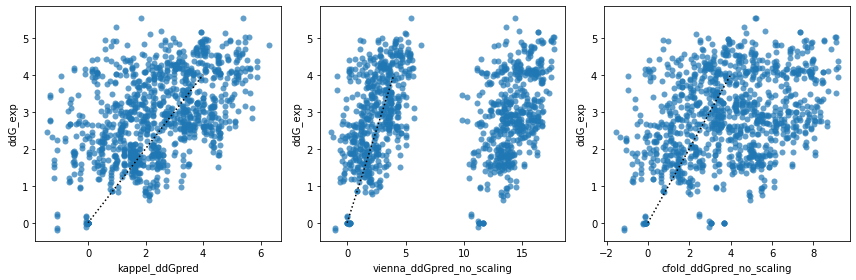

In [27]:
df = pd.read_csv('kappel_pnas_blind_PUM2.txt',delimiter=' ') #supplementary dataset 6

df['dG_vienna'] = df.apply(lambda row: free_energy(row['Seq'], package='vienna_2'), axis=1)
df['dG_cfold'] = df.apply(lambda row: free_energy(row['Seq'], package='contrafold'), axis=1)

df['construct_length'] = df.apply(lambda row:len(row['Seq']),axis=1)
vienna_scaling = 0.37 #detailed in PNAS paper

#computed to account for rosetta/vienna offset
df['offset'] = df['ddG_RNA']-df['dG_vienna'] * vienna_scaling

df['kappel_ddGpred'] = df['ddG_complex-protein']-(df['dG_vienna']*vienna_scaling+df['offset'])
df['vienna_ddGpred_no_scaling'] = df['ddG_complex-protein']-(df['dG_vienna']+df['offset'])
df['cfold_ddGpred_no_scaling'] = df['ddG_complex-protein']-(df['dG_cfold']+df['offset'])

figure(figsize=(12,4))
         
for i, pred in enumerate(['kappel_ddGpred','vienna_ddGpred_no_scaling','cfold_ddGpred_no_scaling']):
    subplot(1,3,i+1)
    sns.scatterplot(x=pred,y='ddG_exp',linewidth=0,alpha=0.7,data=df)
    plot([0,4],[0,4],linestyle=':',color='k')
tight_layout()